<a href="https://colab.research.google.com/github/ukablahblah/Random/blob/main/BobOptimalStrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Expected Profit (Buy for Rain): $500.0
Expected Profit (Buy for Shine): $1000.0
Optimal Strategy: Buy for Shine


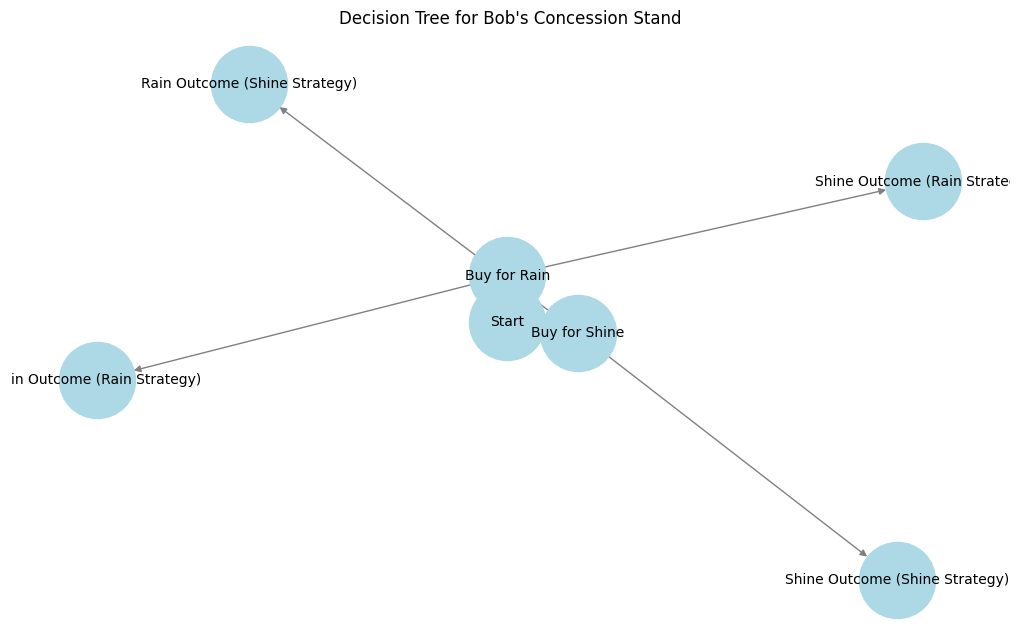

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def expected_profit():
    # Given probabilities
    p_rain = 0.5
    p_shine = 0.5

    # Strategy 1: Buy for Rain
    cost_rain = 500 * 5  # Buying 500 umbrellas
    revenue_rain = 500 * 10  # Selling all 500 umbrellas
    profit_rain = revenue_rain - cost_rain

    cost_shine_rain_strategy = 500 * 5  # Buying 500 umbrellas
    revenue_shine_rain_strategy = 100 * 10  # Only selling 100 umbrellas
    profit_shine_rain_strategy = revenue_shine_rain_strategy - cost_shine_rain_strategy

    expected_rain_strategy = (p_rain * profit_rain) + (p_shine * profit_shine_rain_strategy)

    # Strategy 2: Buy for Shine
    cost_shine = (100 * 5) + (1000 * 2)  # Buying 100 umbrellas + 1000 sunglasses
    revenue_shine = (100 * 10) + (1000 * 5)  # Selling both
    profit_shine = revenue_shine - cost_shine

    cost_rain_shine_strategy = (100 * 5) + (1000 * 2)  # Buying for shine but it's raining
    revenue_rain_shine_strategy = (100 * 10)  # Only selling 100 umbrellas, no sunglasses
    profit_rain_shine_strategy = revenue_rain_shine_strategy - cost_rain_shine_strategy

    expected_shine_strategy = (p_rain * profit_rain_shine_strategy) + (p_shine * profit_shine)

    return expected_rain_strategy, expected_shine_strategy

def plot_decision_tree():
    G = nx.DiGraph()

    # Define nodes
    G.add_node("Start")
    G.add_node("Buy for Rain")
    G.add_node("Buy for Shine")
    G.add_node("Rain Outcome (Rain Strategy)")
    G.add_node("Shine Outcome (Rain Strategy)")
    G.add_node("Rain Outcome (Shine Strategy)")
    G.add_node("Shine Outcome (Shine Strategy)")

    # Define edges
    G.add_edges_from([
        ("Start", "Buy for Rain"),
        ("Start", "Buy for Shine"),
        ("Buy for Rain", "Rain Outcome (Rain Strategy)"),
        ("Buy for Rain", "Shine Outcome (Rain Strategy)"),
        ("Buy for Shine", "Rain Outcome (Shine Strategy)"),
        ("Buy for Shine", "Shine Outcome (Shine Strategy)"),
    ])

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
    plt.title("Decision Tree for Bob's Concession Stand")
    plt.show()

# Compute expected profits
er, es = expected_profit()
print(f"Expected Profit (Buy for Rain): ${er}")
print(f"Expected Profit (Buy for Shine): ${es}")

if er > es:
    print("Optimal Strategy: Buy for Rain")
else:
    print("Optimal Strategy: Buy for Shine")

# Plot decision tree
plot_decision_tree()
